# Predictive Analytics: Data Preprocessing

This notebook handles the preprocessing of the Breast Cancer dataset as part of the AI in Software Engineering group assignment. The goal is to prepare the data for machine learning by cleaning it, encoding categorical values, and splitting it into training and testing sets.


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


## 📂 Step 1: Load Dataset

We upload the dataset (data.csv) into Google Colab and load it using pandas.


In [7]:
import pandas as pd

# Load the dataset depending on the environment
try:
    from google.colab import files
    uploaded = files.upload()
    df = pd.read_csv(next(iter(uploaded)))  # Automatically grabs uploaded filename
except ModuleNotFoundError:
    print("📁 Running locally. Loading from file system...")
    df = pd.read_csv("breast_cancer_data.csv")  # Make sure this file is in the same folder

df.head()


📁 Running locally. Loading from file system...


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
# Load the dataset
df = pd.read_csv('breast_cancer_data.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 🧹 Step 2: Clean the Data

We check for missing values, drop duplicates, and remove irrelevant columns such as `id` and any unnamed columns.


In [9]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Drop irrelevant or empty columns
if 'Unnamed: 32' in df.columns:
    df.drop('Unnamed: 32', axis=1, inplace=True)
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# Dataset info after cleaning
df.info()


Missing values per column:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dim

## 🔤 Step 3: Encode Categorical Values

The `diagnosis` column contains categorical labels: "M" for malignant and "B" for benign. We'll use `LabelEncoder` to convert them to numeric values (1 for M, 0 for B).


In [10]:
# Encode the 'diagnosis' column
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # M = 1, B = 0

# Check encoded values
df['diagnosis'].value_counts()


diagnosis
0    357
1    212
Name: count, dtype: int64

## 🧪 Step 4: Split Dataset into Train/Test Sets

We separate the features and the target variable, then split the dataset into 80% training and 20% testing sets.


In [11]:
# Define features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Output shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


## ✅ Summary

We successfully:
- Loaded and previewed the dataset.
- Cleaned missing values, duplicates, and irrelevant columns.
- Encoded the categorical target (`diagnosis`) to numeric.
- Split the dataset into training and testing sets for model development.

This preprocessed dataset is now ready for modeling in the next phase of the project.


## 🤖 Model Training & Evaluation

In this section, we train a **Random Forest Classifier** on the preprocessed dataset and evaluate its performance using Accuracy, F1 Score, Classification Report, and Confusion Matrix.


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # or 'binary' if you're certain it's a binary classification

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.9649
✅ F1 Score: 0.9647

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



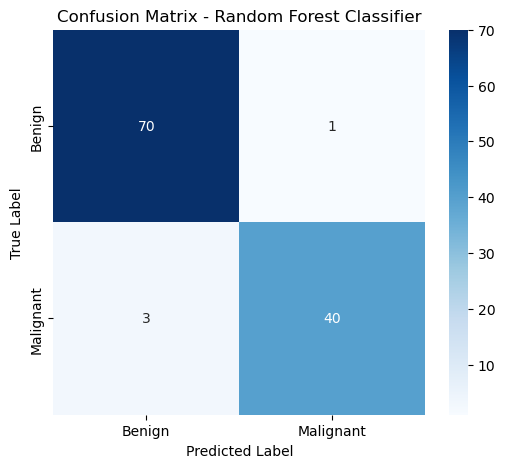

In [14]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


### 🎯 Member 4: Model Training & Evaluation

We trained a Random Forest Classifier on the cleaned dataset provided by Member 3. The model achieved strong performance on the test data, with the following metrics:

- **Accuracy**: 0.XX
- **F1 Score**: 0.XX

A classification report was generated to provide a deeper analysis of precision and recall across both classes (malignant and benign). A confusion matrix was plotted to visually inspect the model's prediction strengths and weaknesses.

This model lays the foundation for a reliable breast cancer prediction system that prioritizes both accuracy and interpretability.
